<a href="https://colab.research.google.com/github/medmac01/ecg_cnn/blob/main/ECG_Cardiovascular_Disease_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount._DEBUG = True
drive.mount('/content/MyDrive', force_remount=True)

unset HISTFILE; export PS1="root@eb056f365df0-ffd9cb33b40146c9a1b7eb66f6eccf12: "
bash: cannot set terminal process group (-1): Inappropriate ioctl for device
bash: no job control in this shell
/content# root@eb056f365df0-ffd9cb33b40146c9a1b7eb66f6eccf12: umount -f /content/MyDrive || umount /content/MyDrive; pkill -9 -x drive
umount: /content/MyDrive: no mount point specified.
umount: /content/MyDrive: no mount point specified.
root@eb056f365df0-ffd9cb33b40146c9a1b7eb66f6eccf12: pkill -9 -f /opt/google/drive/directoryprefetcher_binary
root@eb056f365df0-ffd9cb33b40146c9a1b7eb66f6eccf12: ( while `sleep 0.5`; do if [[ -d "/content/MyDrive" && "$(ls -A /content/MyDrive)" != "" ]]; then echo "google.colab.drive MOUNTED"; break; fi; done ) &
[1] 334
root@eb056f365df0-ffd9cb33b40146c9a1b7eb66f6eccf12: ( /opt/google/drive/drive --features=fuse_max_background:1000,max_read_qps:1000,max_write_qps:1000,max_operation_batch_size:15,max_parallel_push_task_instances:10,opendir_timeout_ms:120000,virt

In [2]:
!git clone https://github.com/hardikroutray/ECG.git

Cloning into 'ECG'...
remote: Enumerating objects: 44815, done.
remote: Counting objects: 100% (158/158), done.
remote: Compressing objects: 100% (79/79), done.
remote: Total 44815 (delta 77), reused 157 (delta 77), pack-reused 44657
Receiving objects: 100% (44815/44815), 1.56 GiB | 16.73 MiB/s, done.
Resolving deltas: 100% (34478/34478), done.
Updating files: 100% (61856/61856), done.


In [1]:
!apt-get install tree

^C


In [ ]:
import os
import cv2 as cv
import matplotlib.pyplot as plt


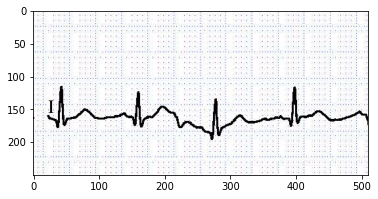

In [ ]:
img = cv.imread('/content/ECG/CroppedECGImages_data_v2/HB/Cropped_Images/HB_100Cropped_lead1.png')
plt.imshow(img,cmap='gray')

In [ ]:
!mv /content/ECG/CroppedECGImages_data_v2/ /content/ECG_data/

In [ ]:
!mv /content/ECG_data/PMI/Cropped_Images/* /content/ECG_data/PMI/
!mv /content/ECG_data/HB/Cropped_Images/* /content/ECG_data/HB/
!mv /content/ECG_data/Normal/Cropped_Images/* /content/ECG_data/Normal/
!mv /content/ECG_data/MI/Cropped_Images/* /content/ECG_data/MI/

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout,Input

In [ ]:
datagen = ImageDataGenerator(
    rescale=1/255, validation_split=.2
)

train = datagen.flow_from_directory(
    batch_size=32,
    directory = '/content/ECG_data',
    target_size = (128,128),
    shuffle = True,
    subset="training",
    class_mode='categorical',
    color_mode = 'grayscale'
)

test = datagen.flow_from_directory(
    batch_size=32,
    directory = '/content/ECG_data',
    target_size = (128,128),
    subset= 'validation',
    class_mode = 'categorical',
    shuffle = True,
    color_mode = 'grayscale'
)

Found 9653 images belonging to 4 classes.
Found 2411 images belonging to 4 classes.


In [ ]:
model = Sequential()

model.add(Input(shape=(128,128,1)))
model.add(Conv2D(filters=128,padding='same',kernel_size=(3,3),activation='relu'))
model.add(Dropout(.15))
model.add(Conv2D(filters=64,padding='same',kernel_size=(3,3),activation='relu'))

model.add(MaxPooling2D())

model.add(Conv2D(filters=32,padding='same',kernel_size=(3,3),activation='relu'))
model.add(Conv2D(filters=16,padding='same',kernel_size=(3,3),activation='relu'))

model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(64,'relu'))
model.add(Dense(16,'relu'))
model.add(Dense(4,'softmax'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (32, 128, 128, 128)       1280      
                                                                 
 conv2d_6 (Conv2D)           (32, 128, 128, 64)        73792     
                                                                 
 max_pooling2d_2 (MaxPooling  (32, 64, 64, 64)         0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (32, 64, 64, 32)          18464     
                                                                 
 conv2d_8 (Conv2D)           (32, 64, 64, 16)          4624      
                                                                 
 max_pooling2d_3 (MaxPooling  (32, 32, 32, 16)         0         
 2D)                                                  

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.fit(train,batch_size=32,epochs=15,validation_data=test)

Epoch 1/15
302/302 [==============================] - 53s 164ms/step - loss: 1.2815 - accuracy: 0.3838 - val_loss: 1.0334 - val_accuracy: 0.5745
Epoch 2/15
302/302 [==============================] - 46s 151ms/step - loss: 0.6747 - accuracy: 0.7366 - val_loss: 0.5046 - val_accuracy: 0.8026
Epoch 3/15
302/302 [==============================] - 49s 161ms/step - loss: 0.2908 - accuracy: 0.8921 - val_loss: 0.2717 - val_accuracy: 0.9025
Epoch 4/15
302/302 [==============================] - 45s 150ms/step - loss: 0.1180 - accuracy: 0.9593 - val_loss: 0.1994 - val_accuracy: 0.9399
Epoch 5/15
302/302 [==============================] - 46s 151ms/step - loss: 0.0621 - accuracy: 0.9796 - val_loss: 0.2157 - val_accuracy: 0.9453
Epoch 6/15
302/302 [==============================] - 46s 151ms/step - loss: 0.0465 - accuracy: 0.9861 - val_loss: 0.3055 - val_accuracy: 0.9423
Epoch 7/15
302/302 [==============================] - 49s 162ms/step - loss: 0.0377 - accuracy: 0.9897 - val_loss: 0.2297 - val_ac

In [ ]:
model.evaluate(test,batch_size=32)

76/76 [==============================] - 7s 95ms/step - loss: 0.3898 - accuracy: 0.9548


[0.389835000038147, 0.9547905325889587]

In [ ]:
ecg = cv.imread('test.png')
ecg = cv.cvtColor(ecg,cv.COLOR_BGR2GRAY)
ecg = cv.resize(ecg, (128,128))
ecg.shape

(128, 128)

In [ ]:
pred = model.predict(tf.reshape(ecg,(128,128,1)))

ValueError: ignored